In [2]:
from Shafaq.legendre import *
from Shafaq.mesh_1d import *
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
from Shafaq.legendre import lgl, lagrange
np.set_printoptions(linewidth=np.inf)

In [19]:
n = 5
xi , w = lgl(n)
n_s = int(n/2) 
u = np.ones(n+1)
u[:n_s] = -u[:n_s]
u_l = sp.interpolate.lagrange(u, w)

/home/Taherak/Venvs/cfd/lib/python3.13/site-packages/numpy/lib/_polynomial_impl.py:1379: RuntimeWarning: divide by zero encountered in divide
  return poly1d(self.coeffs/other)
/home/Taherak/Venvs/cfd/lib/python3.13/site-packages/numpy/lib/_polynomial_impl.py:843: RuntimeWarning: invalid value encountered in add
  val = a1 + a2


In [2]:
d1 = sb.sbp_d(5)
p1 = sb.sbp_p(5)
print([np.sum(d1[i][:]) for i in range(len(d1[0][:]))]), d1


[8.881784197001252e-16, 2.7755575615628914e-17, 5.551115123125783e-17, -5.551115123125783e-17, 0.0, 0.0]


(None,
 array([[-7.50000000e+00,  1.01414159e+01, -4.03618727e+00,  2.24468465e+00, -1.34991331e+00,  5.00000000e-01],
        [-1.78636495e+00,  1.50712776e-14,  2.52342678e+00, -1.15282816e+00,  6.53547507e-01, -2.37781178e-01],
        [ 4.84951048e-01, -1.72125695e+00, -9.43689571e-16,  1.75296197e+00, -7.86356672e-01,  2.69700611e-01],
        [-2.69700611e-01,  7.86356672e-01, -1.75296197e+00,  2.27595720e-15,  1.72125695e+00, -4.84951048e-01],
        [ 2.37781178e-01, -6.53547507e-01,  1.15282816e+00, -2.52342678e+00, -1.77635684e-14,  1.78636495e+00],
        [-5.00000000e-01,  1.34991331e+00, -2.24468465e+00,  4.03618727e+00, -1.01414159e+01,  7.50000000e+00]]))

In [2]:
#####
# 1 - P is SPD 
#####
n = 5
P = sb.sbp_p(n)
tol = 1e-14
print(P)
assert np.allclose(P, P.T, atol=tol),      "P not symmetric"
assert np.allclose(P - np.diag(np.diag(P)), 0, atol=tol), "P has off-diagonals"
assert np.all(np.diag(P) > 0),             "Some P[ii] <= 0"


[[0.06666667 0.         0.         0.         0.         0.        ]
 [0.         0.37847496 0.         0.         0.         0.        ]
 [0.         0.         0.55485838 0.         0.         0.        ]
 [0.         0.         0.         0.55485838 0.         0.        ]
 [0.         0.         0.         0.         0.37847496 0.        ]
 [0.         0.         0.         0.         0.         0.06666667]]


In [3]:
#####
# 2 -  P performs Exact Integration (Up to Machine Percision)
#####
n = 5
p = 6
roots = np.zeros(n+1)
out   = np.zeros(n+1)
roots[:] = sb.lgl(n)[0][:]
out[:]   = sb.lgl(n)[1][:]
np.sum(out@np.power(roots,p)), 2/(p+1)

(np.float64(0.2857142857142868), 0.2857142857142857)

In [9]:
#####
# 3 - Sum of weights = 2
#####
tol = 1e-15
w = out
assert abs(np.sum(w) - 2) < tol, "∑wᵢ ≠ 2"

In [10]:
#####
# 4 - D row sums are = 0 
#####
n = 5
D = sb.sbp_d(n)
assert np.allclose(D.sum(axis=1), 0, atol=tol), "Rows of D do not sum to zero"


(5,)
[[-5.00000000e+00  6.75650249e+00 -2.66666667e+00  1.41016418e+00 -5.00000000e-01]
 [-1.24099025e+00 -4.99600361e-16  1.74574312e+00 -7.63762616e-01  2.59009747e-01]
 [ 3.75000000e-01 -1.33658458e+00  6.10622664e-16  1.33658458e+00 -3.75000000e-01]
 [-2.59009747e-01  7.63762616e-01 -1.74574312e+00 -8.88178420e-16  1.24099025e+00]
 [ 5.00000000e-01 -1.41016418e+00  2.66666667e+00 -6.75650249e+00  5.00000000e+00]]
[np.float64(-1.5), np.float64(-0.9819805060619656), np.float64(0.0), np.float64(0.9819805060619657), np.float64(1.5)] /n [1.5 1.5 1.5 1.5 1.5]


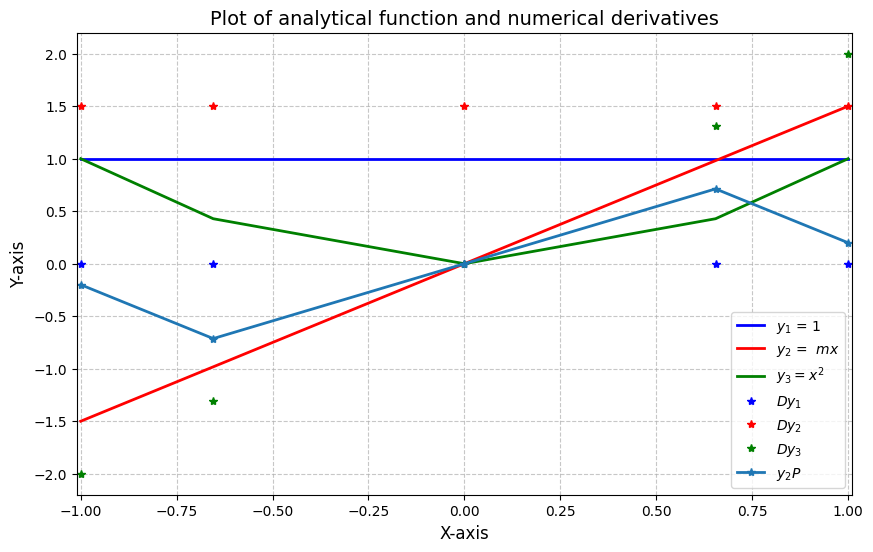

In [11]:
#####
# 5 - D polynomial differentiation
#####

### Setting up the colocation points 
n = 4 # poly nomial order
x = np.zeros(n+1) # Initialization
x[:] = sb.lgl(n)[0,:]

### Setting up analytic functions 
y_1 = np.ones_like(x)
print(np.shape(y_1))
# Defining a linear functions
m = 1.5
y_2 = [m*x[i] for i in range(n+1)]
y_3 = [x[i]**2 for i in range(n+1)]



### Numerical Differentiation 
D = sb.sbp_d(n)
P = sb.sbp_p(n)
print(D)
#print([np.sum(D[i,:]) for i in range(n+1)])
print(y_2 , "/n", D@y_2)
# 
# 
# P 
y_1_d = D@y_1
y_2_d = D@y_2
y_3_d = D@y_3

#Testing the P Matrix As well
y_2_p = P@np.transpose(y_3_d)
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Create figure with specified size

# Plot the data
ax.plot(x, y_1, 'b-', linewidth=2, label="$y_1$ = 1")
ax.plot(x, y_2, 'r-', linewidth=2, label="$y_2$ =  $mx$")
ax.plot(x, y_3, 'g-', linewidth=2, label="$y_3= x^2$")
ax.plot(x, y_1_d, 'b*', linewidth=2, label="$Dy_1$")
ax.plot(x, y_2_d, 'r*', linewidth=2, label="$Dy_2$")
ax.plot(x, D@y_3, 'g*', linewidth=2, label="$Dy_3$")
ax.plot(x, y_2_p, '*-', linewidth=2, label="$y_2P$")
# Set plot labels and title
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_title('Plot of analytical function and numerical derivatives', fontsize=14)

# Add grid, legend and set axis limits
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10)
ax.set_xlim([-1.01, 1.01])
ax.set_ylim([-2.2, 2.2])
plt.show()

In [14]:
#####
# 6 - Q, Skew-symmetric form
#####


#Matrix P
n = 5
out = sb.lgl(n)
roots = np.zeros(n+1)
w = np.zeros(n+1)
w[:] = out[1,:]
roots[:] = out[0,:]
P = sb.sbp_p(n)

D = sb.sbp_d(n)

#Matrix Q from P
dq = sb.sbp_d(n)
result1 = np.zeros_like(P)
for i in range(n+1):
    result1[:,i] = sb.lagrange(n,roots[i]) @dq*w[i]
result1 = result1  
Q = result1
print("The matrix Q from P \n", Q) 

B = np.zeros_like(P)
B[0,0]   = -1
B[-1,-1] =  1
tol = 1e-12
assert np.allclose(Q + Q.T, B, atol=tol), "SBP condition Q+Qᵀ=B failed"
B, Q + Q.T

The matrix Q from P 
 [[-5.00000000e-01 -6.76094396e-01  2.69079151e-01 -1.49645643e-01  8.99942209e-02 -3.33333333e-02]
 [ 6.76094396e-01  5.81965381e-15 -9.55053839e-01  4.36316587e-01 -2.47351364e-01  8.99942209e-02]
 [-2.69079151e-01  9.55053839e-01 -1.87885046e-15 -9.72645632e-01  4.36316587e-01 -1.49645643e-01]
 [ 1.49645643e-01 -4.36316587e-01  9.72645632e-01  2.64887115e-15 -9.55053839e-01  2.69079151e-01]
 [-8.99942209e-02  2.47351364e-01 -4.36316587e-01  9.55053839e-01 -1.04207519e-14 -6.76094396e-01]
 [ 3.33333333e-02 -8.99942209e-02  1.49645643e-01 -2.69079151e-01  6.76094396e-01  5.00000000e-01]]


(array([[-1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.]]),
 array([[-1.00000000e+00, -3.44169138e-15,  2.27595720e-15, -1.36002321e-15,  4.16333634e-16,  1.87350135e-16],
        [-3.44169138e-15,  1.16393076e-14, -2.66453526e-15,  1.72084569e-15,  1.66533454e-16, -9.57567359e-16],
        [ 2.27595720e-15, -2.66453526e-15, -3.75770093e-15, -7.77156117e-16, -1.60982339e-15,  2.10942375e-15],
        [-1.36002321e-15,  1.72084569e-15, -7.77156117e-16,  5.29774229e-15,  4.44089210e-15, -4.05231404e-15],
        [ 4.16333634e-16,  1.66533454e-16, -1.60982339e-15,  4.44089210e-15, -2.08415039e-14,  6.88338275e-15],
        [ 1.87350135e-16, -9.57567359e-16,  2.10942375e-15, -4.05231404e-15,  6.88338275e-15,  1.00000000e+00]]))

In [20]:
################
##### Entropy Flux Function - Done 
################

n = 2 ## Testing degree 
out = lgl(n)
roots, w = np.zeros(n+1),np.zeros(n+1)
roots[:], w[:] = out 
D = sb.sbp_d(n)
P = sb.sbp_p(n)
Q = sb.sbp_q(n)

u = np.array([1,2,3,4]) # Testing with a dummy value 

F = np.zeros((n+1,n+1))
for j in range(n+1): 
    for i in range(n+1): 
        F[i][j] = (1/6)*(u[i]**2 + u[i]*u[j] + u[j]**2)
print(D)



def two_point_flux_function(n, D, u): 
    ## Using numpy broadcasting is much faster than loops 
    ui = u[:,None]
    uj = u[None,:]
    F = np.zeros((n+1,n+1)) 
    F = (1/6)*(ui**2 + ui*uj + uj**2)
    return 2*np.multiply(D,F)

[[-1.5  2.  -0.5]
 [-0.5 -0.   0.5]
 [ 0.5 -2.   1.5]]


In [2]:
class Element1D:
    """
    A 1D element that only stores:
      - left/right physical coords
      - reference nodes xi
      - reference SBP matrices D_ref, P_ref
    and computes its Jacobian & physical‐space operators once, at __init__.
    """
    def __init__(self,
                 index: int,
                 left: float,
                 right: float,
                 xi: np.ndarray,      # reference nodes
                 D_ref: np.ndarray,   # reference D
                 P_ref: np.ndarray,
                 Q_ref: np.ndarray):  # reference P
        self.index   = index
        self.left    = left
        self.right   = right
        self.xi      = xi        # shape (n+1,)
        self.n       = xi.size-1


        # physical nodes: x(ξ) = h*ξ + c
        h         = (right - left)/2
        c         = (right + left)/2
        self.x    = h*xi + c     # shape (n+1,)
        # Jacobian & scaled SBP
        self.J        = h
        self.D_ref    = D_ref
        self.P_ref    = P_ref
        self.Q_ref    = Q_ref
        # physical‐space SBP operators:
        self.D_phys  = D_ref / h         # ∂/∂x = (1/J) ∂/∂ξ
        self.P_phys  = P_ref * h         # ∫_x = ∫_ξ J dξ
        self.Q_phys  = self.P_phys.dot(self.D_phys) # Notice the use of the physical operators 
        self.P_inv   = (1/self.J)*np.linalg.inv(self.P_ref)
        self.el      = np.eye(self.n + 1)[0]
        self.er      = np.eye(self.n + 1)[-1]
        # Initialization for Solution vector and for RHS vector
        self.u          = np.zeros(self.n+1)
        self.irhs       = np.zeros_like(self.u)
        self.sat_rhs    = np.zeros_like(self.u)
        self.rhs        = np.zeros_like(self.u)
        # Runge-Kutta 4 Stage Solution Vectors
        self.K1 = np.zeros_like(self.u)
        self.K2 = np.zeros_like(self.u)
        self.K3 = np.zeros_like(self.u)
        self.K4 = np.zeros_like(self.u)
# -----------------------------------------------------------------------------
    def left_boundary(self): 
        return self.u[0] # This should select the left boundary node
# -----------------------------------------------------------------------------   
    def right_boundary(self): 
        return self.u[-1] # This should select the left boundary node
# -----------------------------------------------------------------------------
    def set_solution_reference(self, u_ref: np.ndarray):
        """Set the nodal values on reference nodes."""
        assert u_ref.shape == (self.n+1,)
        self.u = u_ref.copy()
# -----------------------------------------------------------------------------
    def solution_physical(self) -> np.ndarray:
        """
        Since values are stored at the same nodes,
        U_phys(x_i) = U_ref(xi_i).
        """
        return self.u
# -----------------------------------------------------------------------------    
    def set_initial_condition(self, f):
        """ In: f - a vector of data that must match u size. 
        """
        self.u = f
# -----------------------------------------------------------------------------
    def map_to_reference(self, x_phys: float) -> float:
        return (2*x_phys - (self.left + self.right))/(self.right - self.left)
# -----------------------------------------------------------------------------
    def map_to_physical(self, xi: float) -> float:
        return ( (self.right - self.left)/2 )* xi + (self.right + self.left)/2
# -----------------------------------------------------------------------------    
    def plot(self, ax=None):
        """
        Plot this element’s nodal solution using its own style.
        """
        if ax is None:
            fig, ax = plt.subplots(figsize=(10,3))
            ax.set_xlabel("x")
            ax.set_ylabel("u")
            ax.grid(True)
            ax.set_title("Solution per element")

        ax.plot(self.x, self.u, label="u")
        ax.grid(True)
        return ax
# -----------------------------------------------------------------------------
    def SAT_rhs(self, gl, gr): 
        """This method calculates the RHS contribution to this element from the neighboring elements via gl and gr.
        Note: Each call of this method will calculate and store the output in its corresponding vector. 
        """
        ul, ur   = self.left_boundary(), self.right_boundary()
        taul     = -(ul + abs(ul)) / 3.0
        taur     =  (ur - abs(ur)) / 3.0
        SAT      =  taul*(ul - gl)*self.el + taur*(ur - gr)*self.er
        self.SAT =  self.P_inv.dot(SAT)
        return self.P_inv@SAT
# -----------------------------------------------------------------------------    
    def interior_RHS(self):
        """This method calculates the RHS contribution from the interior operator.
        Note: Each call of this method will calculate and store the output in its corresponding vector. 
        """
        irhs = -sb.two_point_flux_function(self.n, self.D_ref, self.u) ## - 2(DF)*(Ones)
        self.irhs = irhs
        return irhs
# -----------------------------------------------------------------------------
    def element_rhs(self, gl, gr): 
        """This method calculates the total RHS contribution from the IRHS and SAT_RHS. 
        Note: Each call of this method will calculate and store the output in its corresponding vector. 
        """
        irhs     = self.interior_RHS()
        sat_rhs  = self.SAT_rhs(gl, gr)
        self.rhs = irhs + sat_rhs
        return self.rhs
# -----------------------------------------------------------------------------
    def __dir__(self):
        """
        Return the usual dir() list *plus* all runtime attributes so that
        IPython / Jupyter Tab-completion shows x, D_ref, etc.
        """
        # standard names from the superclass
        std = super().__dir__()
        # everything created in __init__
        dynamic = list(self.__dict__.keys())
        # merge and deduplicate
        return sorted(set(std + dynamic))


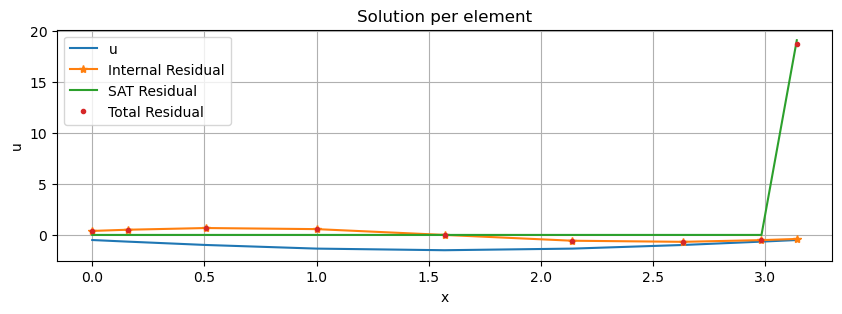

In [12]:
n = 8
D = sb.sbp_d(n)
P = sb.sbp_p(n)
Q = sb.sbp_q(n)
xi, out = lgl(n)
xi,out 
l = 0 
r = np.pi
L = r - l 

e1 = Element1D(0,l,r,xi,D,P,Q)

def initial_condition(x, L=1): 
    return -0.5 - np.sin(x**L)


e1.u, e1.set_initial_condition(initial_condition(e1.x))
ax = e1.plot()
ax.plot(e1.x, e1.interior_RHS(),"*-",  label="Internal Residual")
ax.plot(e1.x, e1.SAT_rhs(1,2), "-",label="SAT Residual")
ax.plot(e1.x, e1.element_rhs(1,2), ".", label="Total Residual")
ax.legend()
plt.show()


In [3]:


class Mesh1D:
    """
    1D mesh composed of equally spaced Element1D objects,
    with all SBP operators provided externally.
    """
    def __init__(self,
                 x_min: float,
                 x_max: float,
                 nex: int,
                 n: int,
                 xi: np.ndarray,
                 w: np.ndarray,
                 D_ref: np.ndarray,
                 P_ref: np.ndarray,
                 Q_ref: np.ndarray):
        """
        Initialize the mesh and its elements.

        Parameters
        ----------
        x_min, x_max : float
            Physical domain endpoints.
        nex : int
            Number of elements.
        n : int
            Polynomial degree (n+1 LGL nodes per element).
        xi : np.ndarray
            Reference nodes (length n+1).
        w : np.ndarray
            Reference weights (length n+1).
        D_ref : np.ndarray
            Differentiation matrix on reference.
        P_ref : np.ndarray
            Norm (quadrature) matrix on reference.
        Q_ref : np.ndarray
            Skew-symmetric SBP matrix on reference.
        """
        # store mesh parameters
        self.x_min, self.x_max = x_min, x_max
        self.nex, self.n       = nex, n

        # store reference SBP data
        self.xi    = xi.copy()
        self.w     = w.copy()
        self.D_ref = D_ref.copy()
        self.P_ref = P_ref.copy()
        self.Q_ref = Q_ref.copy()
        self.el    = np.eye(self.n + 1)
        self.er    = np.eye(self.n + 1)

        # build physical elements
        self.elements = []
        dx = (self.x_max - self.x_min) / self.nex
        for i in range(self.nex):
            L = self.x_min + i * dx
            R = L + dx
            elem = Element1D(
                index=i,
                left=L,
                right=R,
                xi=self.xi,
                D_ref=self.D_ref,
                P_ref=self.P_ref,
                Q_ref=self.Q_ref
            )
            self.elements.append(elem)


# -----------------------------------------------------------------------------
    def set_solution(self, U: np.ndarray):
        """
        Assign a full solution array to mesh elements.

        U must have shape (nex, n+1).
        """
        assert U.shape == (self.nex, self.n+1), \
            f"Expected U shape ({self.nex},{self.n+1}), got {U.shape}"
        for elem, u_row in zip(self.elements, U):
            elem.set_solution_reference(u_row)
# -----------------------------------------------------------------------------
    def global_coordinates(self) -> np.ndarray:
        """
        Return sorted unique global node coordinates across elements.
        """
        coords = []
        for elem in self.elements:
            coords.extend(elem.x.tolist())
        return np.unique(coords)
# -----------------------------------------------------------------------------   
    def x(self) -> np.ndarray:
        """
        Return a 2D NumPy array of physical node coordinates for each element.

        Output shape is (nex, n+1), where each row gives `elem.x`.
        """
        # Stack each element's x array into a 2D array
        return np.vstack([elem.x for elem in self.elements])
# -----------------------------------------------------------------------------
    def set_initial_condition(self, f):
        """ F is a function that takes in the coordinates. 
        """
        for idx, elem in enumerate(m1.elements):
            x_phys = elem.x
            y_num = f(x_phys)
            elem.set_initial_condition(y_num)
# -----------------------------------------------------------------------------
    def plot(self,
             ax=None,
             edge_opts=None,
             node_opts=None,
             boundary_opts=None,
             figsize=None):
        """
        Draw the mesh edges, nodes, and element boundaries on the given Axes.

        Parameters
        ----------
        ax : matplotlib.axes.Axes, optional
            Axes to draw on. If None, creates new figure if figsize provided or uses plt.gca().
        edge_opts : dict, optional
            Style for element edges.
        node_opts : dict, optional
            Style for element nodes.
        boundary_opts : dict, optional
            Style for element boundary lines.
        figsize : tuple, optional
            Figure size (width, height) in inches, used only if ax is None to create a new figure.

        Returns
        -------
        ax : matplotlib.axes.Axes
            The Axes with the mesh drawn.
        """
        # create new figure/axes if none provided
        if ax is None:
            if figsize is not None:
                fig, ax = plt.subplots(figsize=figsize)
            else:
                ax = plt.gca()

        # default styles
        edge_defaults = {"linestyle": "-", "linewidth": 1, "color": "k"}
        node_defaults = {"marker": "o", "linestyle": "", "color": "C0"}
        boundary_defaults = {"linestyle": "--", "linewidth": 1, "color": "gray"}

        eopts = {**edge_defaults, **(edge_opts or {})}
        nopts = {**node_defaults, **(node_opts or {})}
        bopts = {**boundary_defaults, **(boundary_opts or {})}

        # plot element edges and n
        for elem in self.elements:
            x = elem.x
            y = np.zeros_like(x)
            ax.plot(x, y, **eopts)
            ax.plot(x, y, **nopts)
            ax.set_title("Mesh Nodes")
            ax.set_xlabel("x - coordinate")
            ax.set_ylabel("u")
        # plot element boundaries
        ymin, ymax = ax.get_ylim()
        for elem in self.elements:
            #ax.plot([elem.left, elem.left], [ymin, ymax], **bopts)
            ax.axvline(elem.left, **bopts) # This makes sure that the boundary lines span to the maximum edges of the figure
            ax.axvline(elem.right, **bopts) # This makes sure that the boundary lines span to the maximum edges of the figure
        ax.plot([self.x_max, self.x_max], [ymin, ymax], **bopts)
        return ax
# -----------------------------------------------------------------------------    
    def rhs(self):
        """
        Compute du/dt for every element under periodic BCs,
        storing each element’s residual in elem.rhs.
        """
        NE = self.nex

        for e_id, elem in enumerate(self.elements):
            # periodic neighbor indices
            left_id  = (e_id - 1) % NE
            right_id = (e_id + 1) % NE

            # neighbor boundary values
            gL = self.elements[left_id].right_boundary()
            gR = self.elements[right_id].left_boundary()

            # this populates elem.rhs internally
            elem.element_rhs(gL, gR)
# ----------------------------------------------------------------------------- 
    def export_global_rhs(self) -> np.ndarray:
        """
        Compute and return the complete mesh‐wide RHS as a 1D vector
        (periodic BCs assumed). Does NOT store it on self.
        """
        NE = self.nex
        # First, update each element’s local rhs
        for e_id, elem in enumerate(self.elements):
            left_id  = (e_id - 1) % NE
            right_id = (e_id + 1) % NE
            gL = self.elements[left_id].right_boundary()
            gR = self.elements[right_id].left_boundary()
            elem.element_rhs(gL, gR)

        # Then concatenate all element.rhs into one vector
        return np.concatenate([elem.rhs for elem in self.elements])
# -----------------------------------------------------------------------------
    def step_rk4(self, dt):
        """
        One RK4 step of size dt, done entirely via element_rhs
        and per-element state copies.
        """
        NE = self.nex

        # 1) Save each element's current u  →  U0[e]
        U0 = [elem.u.copy() for elem in self.elements]

        # 2) Stage 1: compute K1 = RHS(u^n)
        for e, elem in enumerate(self.elements):
            left_id, right_id = (e-1)%NE, (e+1)%NE
            gL = self.elements[left_id].right_boundary()
            gR = self.elements[right_id].left_boundary()
            elem.element_rhs(gL, gR)
            # store K1 in the element itself
            elem.K1 = elem.rhs.copy()

        # 3) Stage 2: u = U0 + (dt/2)*K1; compute K2
        for e, elem in enumerate(self.elements):
            elem.u = U0[e] + 0.5*dt*elem.K1
        for e, elem in enumerate(self.elements):
            left_id, right_id = (e-1)%NE, (e+1)%NE
            gL = self.elements[left_id].right_boundary()
            gR = self.elements[right_id].left_boundary()
            elem.element_rhs(gL, gR)
            elem.K2 = elem.rhs.copy()

        # 4) Stage 3: u = U0 + (dt/2)*K2; compute K3
        for e, elem in enumerate(self.elements):
            elem.u = U0[e] + 0.5*dt*elem.K2
        for e, elem in enumerate(self.elements):
            left_id, right_id = (e-1)%NE, (e+1)%NE
            gL = self.elements[left_id].right_boundary()
            gR = self.elements[right_id].left_boundary()
            elem.element_rhs(gL, gR)
            elem.K3 = elem.rhs.copy()

        # 5) Stage 4: u = U0 + dt*K3; compute K4
        for e, elem in enumerate(self.elements):
            elem.u = U0[e] +     dt*elem.K3
        for e, elem in enumerate(self.elements):
            left_id, right_id = (e-1)%NE, (e+1)%NE
            gL = self.elements[left_id].right_boundary()
            gR = self.elements[right_id].left_boundary()
            elem.element_rhs(gL, gR)
            elem.K4 = elem.rhs.copy()

        # 6) Final update: u = U0 + (dt/6)(K1+2K2+2K3+K4)
        for e, elem in enumerate(self.elements):
            elem.u = (
                U0[e]
                + (dt/6.0)
                * (elem.K1 + 2*elem.K2 + 2*elem.K3 + elem.K4)
            )
        
        


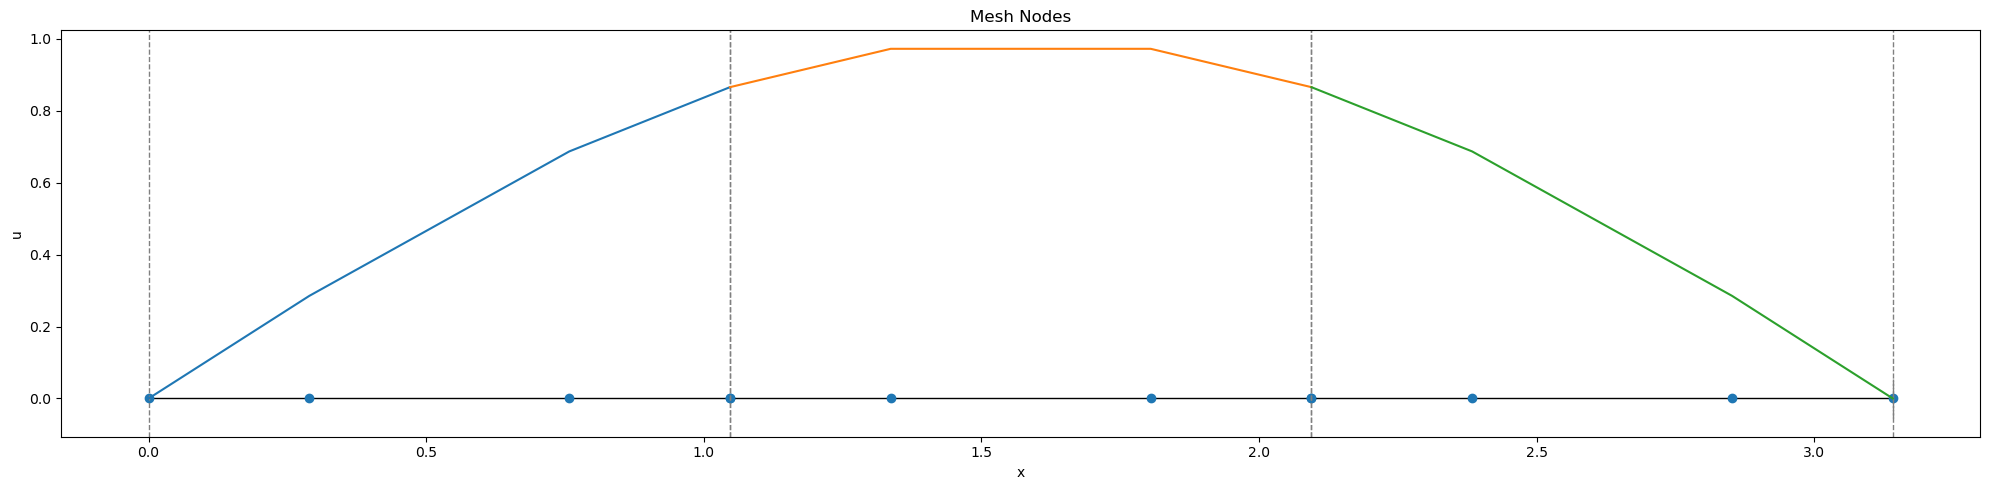

(3, 4)

In [4]:
n = 3
D = sb.sbp_d(n)
P = sb.sbp_p(n)
Q = sb.sbp_q(n)
xi, out = lgl(n)
xi,out 
l = 0 
r = np.pi
L = r - l 
nex = 3


fig, ax = plt.subplots(figsize=(20,5))
m1 = Mesh1D(l,r,nex, n, xi,out,D,P,Q)
m1.plot(ax=ax)

#test = np.sin(m1.x())
#ax.plot(m1.x(), test)


for idx, elem in enumerate(m1.elements):
    x_phys = elem.x
    y_sin = np.sin(x_phys)
    elem.set_initial_condition(y_sin)
    y = elem.u
    ax.plot(x_phys, y)

ax.set_xlabel("x")
ax.set_ylabel("u")
#ax.legend(fontsize="small")
plt.tight_layout()
plt.show()

plt.show()

m1.x().shape

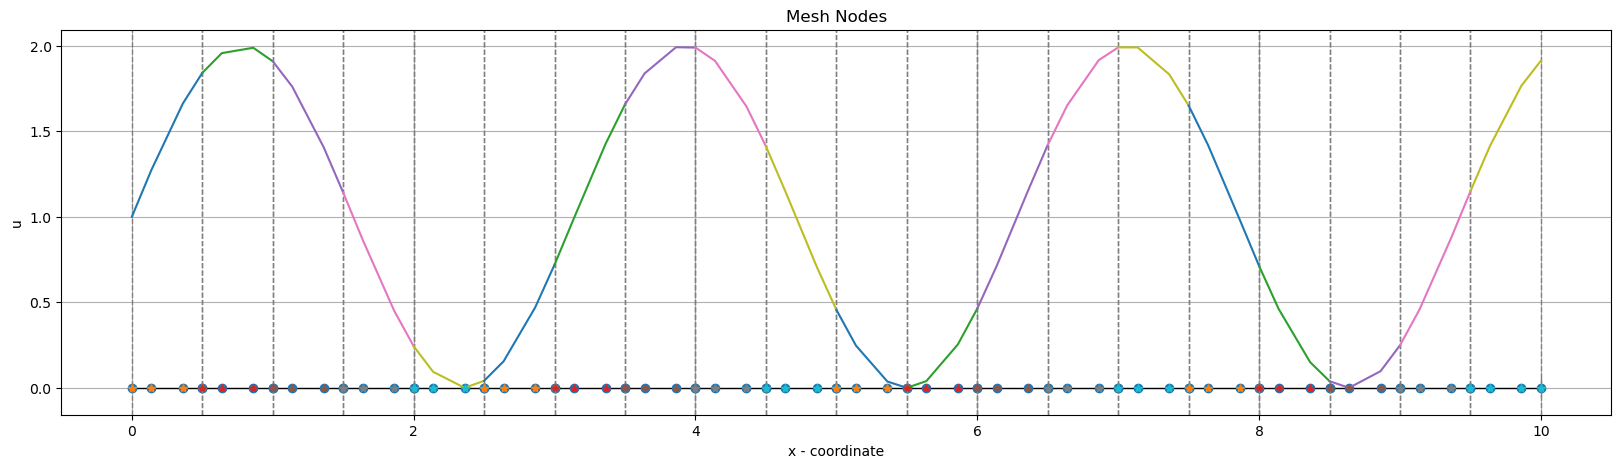

In [27]:
n = 3
D = sb.sbp_d(n)
P = sb.sbp_p(n)
Q = sb.sbp_q(n)
xi, out = lgl(n)
xi,out 
l = 0 
r = 10
L = r - l 
nex = 20
fig, ax = plt.subplots(figsize=(20,5))
m1 = Mesh1D(l,r,nex, n, xi,out,D,P,Q)
#m1.plot(ax=ax)
def f(x): 
    return np.sin(2*x)+1 
m1.set_initial_condition(f)
m1.rhs()
m1.plot()
for i, elem in enumerate(m1.elements):
    ax.plot(elem.x, elem.u, label="Solution")
    #ax.plot(elem.x, elem.irhs, "+-", label="Interior RHS")
    ax.plot(elem.x, elem.sat_rhs, "*", label="SAT RHS")
    #ax.plot(elem.x, elem.rhs, "o", label="Total RHS")
    ax.grid(True)
#ax.legend()

In [15]:
sb.sbp_p(2)

array([[0.33333333, 0.        , 0.        ],
       [0.        , 1.33333333, 0.        ],
       [0.        , 0.        , 0.33333333]])

In [16]:
t = 0.0
while t < t_final:
    rk4_step(mesh, dt)
    t += dt


NameError: name 't_final' is not defined

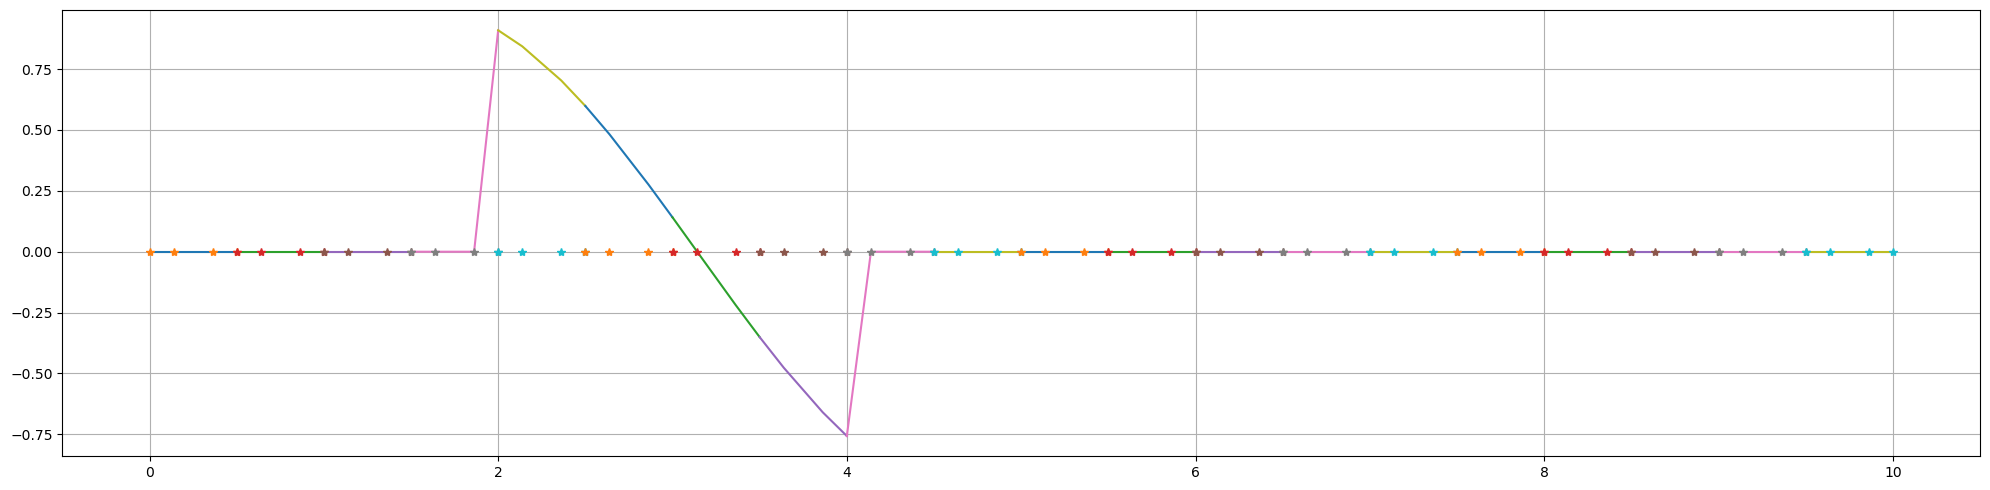

In [30]:
import numpy as np
# 1) Compute global domain once
x_all  = m1.x().flatten()
xmin, xmax = x_all.min(), x_all.max()

# 2) Precompute your target interval [x0, x1] in global space
x0 = xmin + 0.2*(xmax - xmin)
x1 = xmin + 0.40*(xmax - xmin)

# 3) Define ivbc to mask on those fixed values
def ivbc(x):
    """
    Zero everywhere except on the global [x0,x1], 
    where u = sin(x).
    """
    u = np.zeros_like(x)
    mask = (x >= x0) & (x <= x1)
    u[mask] = np.sin(x[mask])
    return u

# 4) Apply to the mesh



m1.set_initial_condition(ivbc)
m1.rhs()
fig, ax = plt.subplots(figsize=(20,5))
for i, elem in enumerate(m1.elements):
    ax.plot(elem.x, elem.u, label="Solution")
    #ax.plot(elem.x, elem.irhs, "+-", label="Interior RHS")
    ax.plot(elem.x, elem.sat_rhs, "*", label="SAT RHS")
    #ax.plot(elem.x, elem.rhs, "o", label="Total RHS")
    ax.grid(True)
#ax.legend()

plt.tight_layout()
plt.show()

plt.show()


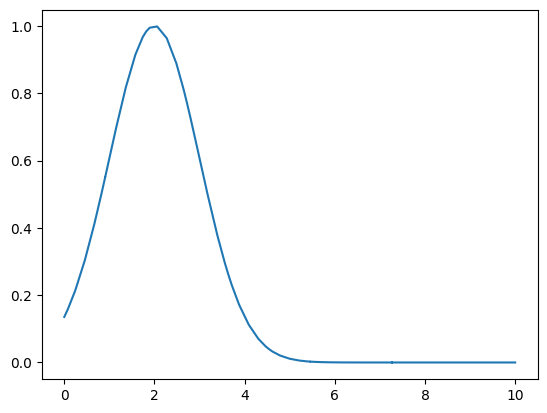

In [16]:
def gaussian(x, mu=2, sigma=1.0):
    return np.exp(-((x - mu)**2) / (2 * sigma**2))


# --- 1) Problem parameters ---
Lx      = 10           # domain length
nex     = 11             # number of elements
poly_p  = 6              # polynomial degree (n)
t_final = 100            # final time
dt      = 1e-3
plot_every = 10
# --- 2) Build SBP operators on reference ---
n     = poly_p
xi, w = lgl(n)
D_ref = sbp_d(n)
P_ref = sbp_p(n)
Q_ref = sbp_q(n)

# --- 3) Create mesh and set initial condition u(x,0) = sin(2πx/Lx) + 1 ---
mesh = Mesh1D(x_min=0.0,
              x_max=Lx,
              nex=nex,
              n=n,
              xi=xi,
              w=w,
              D_ref=D_ref,
              P_ref=P_ref,
              Q_ref=Q_ref, nu = 1e-3, linear=True)
z = mesh.x().flatten() 
plt.plot(z,gaussian(z))

plt.show()

In [3]:
n = 5 
xi , w = lgl(n)
V = Vmonde_orthonormal(xi,w,  n)
V.T @ np.diag(w) @ V

array([[ 1.00000000e+00, -5.55111512e-17,  1.26287869e-15,  1.66533454e-16,  1.54043445e-15,  2.77555756e-17],
       [ 6.93889390e-18,  1.00000000e+00,  5.55111512e-17,  2.47024623e-15,  2.22044605e-16, -2.49800181e-16],
       [ 1.26287869e-15,  1.38777878e-16,  1.00000000e+00,  1.66533454e-16,  1.38777878e-16, -2.49800181e-16],
       [ 1.80411242e-16,  2.49800181e-15,  1.94289029e-16,  1.00000000e+00, -3.33066907e-16, -1.97064587e-15],
       [ 1.56819002e-15,  1.38777878e-16,  1.38777878e-16, -3.33066907e-16,  1.00000000e+00,  1.66533454e-16],
       [-2.77555756e-17, -3.05311332e-16, -2.49800181e-16, -1.99840144e-15,  1.66533454e-16,  1.00000000e+00]])